Code to (re)produce results in the paper 
"Manipulating the Online Marketplace of Ideas" 
by Xiaodan Lou, Alessandro Flammini, and Filippo Menczer
https://arxiv.org/abs/1907.06130

Notes:
* Need Python 3.6 or later; eg: `module load python/3.6.6`
* Remember link direction is following, opposite of info spread!
* For large `n_humans`, it's much faster to run the simulations in parallel on a server or cluster, eg, one process for each combination of parameters (gamma, phi, mu...)


Parameters and default values:
```
n_humans = 1000 # 10k for paper
beta = 0.1 # bots/humans ratio; 0.1 for paper
p = 0.5 # for network clustering; 0.5 for paper
k_out = 3 # average no. friends within humans & bots; 3 for paper
alpha = 15 # depth of feed; 15 for paper
mu = 0.75 # average prob of new meme vs retweet; 0.75 for paper or draw from empirical distribution
phi = 1 # bot deception >= 1: meme fitness higher than quality
gamma = 0.1 # infiltration: probability that a human follows each bot
epsilon = 0.01 # threshold used to check for steady-state convergence
n_runs = 10 # or 20? number of simulations to average results
csvfile = 'results.csv' # to save results for plotting
```

In [1]:
import networkx as nx
import random
import numpy
import math
import statistics
import csv
import matplotlib.pyplot as plt
from operator import itemgetter
import sys
import fcntl
import time
import bot_model

%matplotlib inline
assert(nx.__version__ >= '2.4')

# Random vs preferential targeting
## Simplified simulations: no tracking for diversity, kendall tau, pop. distr., or amplification

In [0]:
for mu in [0.75, 0.25]
    for gamma in [0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1.0]: 
      q_random = []
      q_preferential = []
      q_ratio = []
      for sim in range(n_runs):
        print('Running Simulation ', sim, ' for gamma = ', gamma, ' ...', flush=True)
        qr = bot_model.simulation(False, mu=mu, gamma=gamma)
        qp = bot_model.simulation(True, mu=mu, gamma=gamma)
        q_random.append(qr)
        q_preferential.append(qp)
        q_ratio.append(qp/qr)

      # save results to CSV file
      bot_model.save_csv([gamma, statistics.mean(q_random), 
                statistics.stdev(q_random) / math.sqrt(n_runs), 
                statistics.mean(q_preferential), 
                statistics.stdev(q_preferential) / math.sqrt(n_runs), 
                statistics.mean(q_ratio), 
                statistics.stdev(q_ratio) / math.sqrt(n_runs)], csvfile="results_N1000_mu{}.csv".format(mu))

In [0]:
# plot data from CSV file

q_mean_random, q_stderr_random, q_mean_preferential, q_stderr_preferential, q_mean_ratio, q_stderr_ratio = bot_model.read_csv('results.csv')

ymin = [q_mean_ratio[x] - q_stderr_ratio[x] for x in q_mean_ratio.keys()]
ymax = [q_mean_ratio[x] + q_stderr_ratio[x] for x in q_mean_ratio.keys()]
plt.xlabel(r'$\gamma$', fontsize=16)
plt.ylabel('Average Quality Ratio', fontsize=16)
plt.xscale('log')
plt.axhline(y=1, lw=0.5, color='black')
plt.plot(list(q_mean_ratio.keys()), list(q_mean_ratio.values()))
plt.fill_between(list(q_mean_ratio.keys()), ymax, ymin, alpha=0.2)

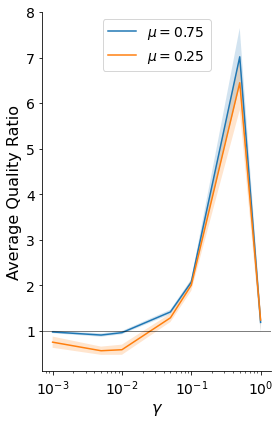

In [0]:
# plot from files for different values of mu

plt.subplots(figsize=plt.figaspect(1.5))

_, _, _, _, ratio_mu75, stderr_mu75 = bot_model.read_csv('results_N1000_mu0.75.csv')
ymin_mu75 = [ratio_mu75[x] - 2*stderr_mu75[x] for x in ratio_mu75.keys()]
ymax_mu75 = [ratio_mu75[x] + 2*stderr_mu75[x] for x in ratio_mu75.keys()]
plt.plot(list(ratio_mu75.keys()), list(ratio_mu75.values()), label=r'$\mu=0.75$')
plt.fill_between(list(ratio_mu75.keys()), ymax_mu75, ymin_mu75, alpha=0.2)

_, _, _, _, ratio_mu25, stderr_mu25 = bot_model.read_csv('results_N1000_mu0.25.csv')
ymin_mu25 = [ratio_mu25[x] - 2*stderr_mu25[x] for x in ratio_mu25.keys()]
ymax_mu25 = [ratio_mu25[x] + 2*stderr_mu25[x] for x in ratio_mu25.keys()]
plt.plot(list(ratio_mu25.keys()), list(ratio_mu25.values()), label=r'$\mu=0.25$')
plt.fill_between(list(ratio_mu25.keys()), ymax_mu25, ymin_mu25, alpha=0.2)

plt.xlabel(r'$\gamma$', fontsize=16)
plt.ylabel('Average Quality Ratio', fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xscale('log')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.axhline(y=1, lw=0.5, color='black')
plt.legend(fontsize=14, loc='upper center')
plt.tight_layout()
plt.savefig('fig_targeting.pdf')